In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/anime.csv')


In [ ]:
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


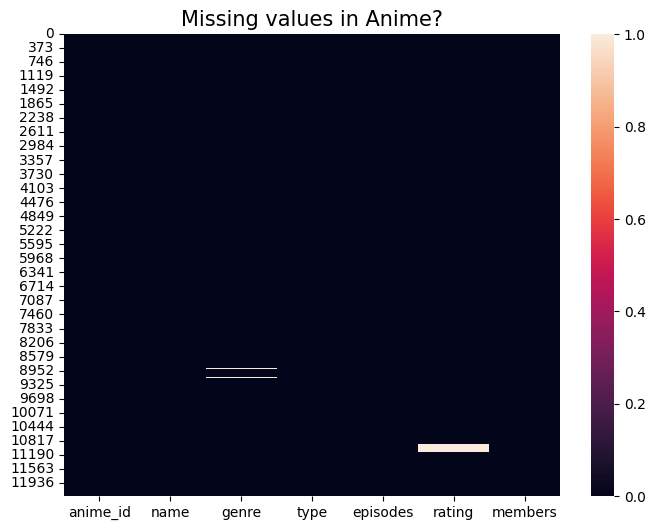

In [ ]:
#Lets visualize the data

plt.figure(figsize=(8,6))
sns.heatmap(df.isnull())
plt.title("Missing values in Anime?",fontsize = 15)
plt.show()

In [ ]:
#Rating is our Target Variable

df['rating'].value_counts()


rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
3.47      1
3.71      1
3.87      1
3.91      1
3.14      1
Name: count, Length: 598, dtype: int64

In [ ]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
# Eliminate colums anime_id and name

df.drop(columns=['anime_id','name'], inplace=True)


In [ ]:
df.head()

,genre,type,episodes,rating,members
0,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,"Sci-Fi, Thriller",TV,24,9.17,673572
4,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
#checking missing values

print(df.isnull().sum())


genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [ ]:
# Check for 'Unknown' values
print(df.isin(['Unknown']).sum())


genre         0
type          0
episodes    340
rating        0
members       0
dtype: int64


In [ ]:
# Replacing 'Unknown' with NaN
df.replace('Unknown', np.nan, inplace=True)

In [ ]:
# Now check for missing values
print(df.isnull().sum())

genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64


In [ ]:
# Impute missing values
df['genre'].fillna(df['genre'].mode()[0], inplace=True)
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['rating'] = df['rating'].astype(float)
df['rating'].fillna(df['rating'].mean(), inplace=True)
df['members'] = df['members'].astype(float)
df['members'].fillna(df['members'].mean(), inplace=True)

In [ ]:
# Now check for missing values
print(df.isnull().sum())

genre         0
type          0
episodes    340
rating        0
members       0
dtype: int64


In [ ]:
# Tokenize the genre column
df['genre'] = df['genre'].apply(lambda x: x.split(', '))

In [ ]:
# Use MultiLabelBinarizer to one-hot encode the genres
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['genre'])

In [ ]:
# Create a new DataFrame with the encoded genres
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

In [ ]:
# Concatenate the new genre DataFrame with the original DataFrame
df = pd.concat([df, genre_df], axis=1).drop('genre', axis=1)

In [ ]:
# One-hot encode the 'type' column
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [ ]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df[['episodes', 'rating', 'members']] = scaler.fit_transform(df[['episodes', 'rating', 'members']])

# Display the first few rows of the processed DataFrame
print(df.head())

   episodes    rating    members  Action  Adventure  Cars  Comedy  Dementia  \
0 -0.242888  2.847535   3.330241       0          0     0       0         0   
1  1.101445  2.739380  14.148406       1          1     0       0         0   
2  0.824043  2.729547   1.754713       1          0     0       1         0   
3  0.247900  2.650889  11.957666       0          0     0       0         0   
4  0.824043  2.641057   2.429742       1          0     0       1         0   

   Demons  Drama  ...  Supernatural  Thriller  Vampire  Yaoi  Yuri  \
0       0      1  ...             1         0        0     0     0   
1       0      1  ...             0         0        0     0     0   
2       0      0  ...             0         0        0     0     0   
3       0      0  ...             0         1        0     0     0   
4       0      0  ...             0         0        0     0     0   

   type_Music  type_ONA  type_OVA  type_Special  type_TV  
0       False     False     False         Fal

In [ ]:
# Again checking for missing values
print(df.isnull().sum())

episodes         340
rating             0
members            0
Action             0
Adventure          0
Cars               0
Comedy             0
Dementia           0
Demons             0
Drama              0
Ecchi              0
Fantasy            0
Game               0
Harem              0
Hentai             0
Historical         0
Horror             0
Josei              0
Kids               0
Magic              0
Martial Arts       0
Mecha              0
Military           0
Music              0
Mystery            0
Parody             0
Police             0
Psychological      0
Romance            0
Samurai            0
School             0
Sci-Fi             0
Seinen             0
Shoujo             0
Shoujo Ai          0
Shounen            0
Shounen Ai         0
Slice of Life      0
Space              0
Sports             0
Super Power        0
Supernatural       0
Thriller           0
Vampire            0
Yaoi               0
Yuri               0
type_Music         0
type_ONA     

In [ ]:
#Again Removing missing values from episodes

df['episodes'] = df['episodes'].fillna(df['episodes'].mean())


In [ ]:
print(df.isnull().sum())

episodes         0
rating           0
members          0
Action           0
Adventure        0
Cars             0
Comedy           0
Dementia         0
Demons           0
Drama            0
Ecchi            0
Fantasy          0
Game             0
Harem            0
Hentai           0
Historical       0
Horror           0
Josei            0
Kids             0
Magic            0
Martial Arts     0
Mecha            0
Military         0
Music            0
Mystery          0
Parody           0
Police           0
Psychological    0
Romance          0
Samurai          0
School           0
Sci-Fi           0
Seinen           0
Shoujo           0
Shoujo Ai        0
Shounen          0
Shounen Ai       0
Slice of Life    0
Space            0
Sports           0
Super Power      0
Supernatural     0
Thriller         0
Vampire          0
Yaoi             0
Yuri             0
type_Music       0
type_ONA         0
type_OVA         0
type_Special     0
type_TV          0
dtype: int64


In [ ]:
# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(df.drop('rating', axis=1))


In [ ]:
def recommend_anime(anime_id, similarity_matrix, df, threshold=0.5, top_n=10):
    # Get the index of the anime with the given anime_id
    idx = df.index[df.index == anime_id].tolist()[0]

    # Get the pairwise similarity scores for the given anime
    sim_scores = list(enumerate(similarity_matrix[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Filter out anime below the threshold and exclude the anime itself
    sim_scores = [(i, score) for i, score in sim_scores if score > threshold and i != idx]

    # Get the top_n similar anime
    sim_scores = sim_scores[:top_n]

    # Get the anime details for the top_n similar anime
    similar_anime = [(df.index[i], df.iloc[i].to_dict()) for i, score in sim_scores]

    return similar_anime

# Example usage
target_anime_id = 1  # Fullmetal Alchemist: Brotherhood
recommendations = recommend_anime(target_anime_id, similarity_matrix, df, threshold=0.5, top_n=5)
for anime_id, details in recommendations:
    print(f"Anime ID: {anime_id}, Details: {details}")


Anime ID: 200, Details: {'episodes': 0.8240430074817066, 'rating': 1.8249743555283473, 'members': 10.622567579328551, 'Action': 1, 'Adventure': 1, 'Cars': 0, 'Comedy': 1, 'Dementia': 0, 'Demons': 0, 'Drama': 1, 'Ecchi': 0, 'Fantasy': 1, 'Game': 0, 'Harem': 0, 'Hentai': 0, 'Historical': 0, 'Horror': 0, 'Josei': 0, 'Kids': 0, 'Magic': 1, 'Martial Arts': 0, 'Mecha': 0, 'Military': 1, 'Music': 0, 'Mystery': 0, 'Parody': 0, 'Police': 0, 'Psychological': 0, 'Romance': 0, 'Samurai': 0, 'School': 0, 'Sci-Fi': 0, 'Seinen': 0, 'Shoujo': 0, 'Shoujo Ai': 0, 'Shounen': 1, 'Shounen Ai': 0, 'Slice of Life': 0, 'Space': 0, 'Sports': 0, 'Super Power': 0, 'Supernatural': 0, 'Thriller': 0, 'Vampire': 0, 'Yaoi': 0, 'Yuri': 0, 'type_Music': False, 'type_ONA': False, 'type_OVA': False, 'type_Special': False, 'type_TV': True}
Anime ID: 86, Details: {'episodes': 0.2692389469025358, 'rating': 2.0314529740362195, 'members': 16.01938223793189, 'Action': 1, 'Adventure': 0, 'Cars': 0, 'Comedy': 0, 'Dementia': 0, '

In [ ]:
# Spliting  the data into test and train

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('rating', axis=1)
y = df['rating']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Number of training examples: {X_train.shape[0]}")
print(f"Number of testing examples: {X_test.shape[0]}")


Number of training examples: 9835
Number of testing examples: 2459


In [ ]:
#Evaluating  the recommendation system using  precision, recall, and F1-score

from sklearn.metrics import precision_score, recall_score, f1_score

# Predicted ratings for the test set
predicted_ratings = model.predict(X_test)

# Binarize the predicted and actual ratings
binarized_predicted_ratings = [1 if rating > 0.5 else 0 for rating in predicted_ratings]
binarized_actual_ratings = [1 if rating > 0.5 else 0 for rating in y_test]

# Calculate the precision, recall, and F1-score
precision = precision_score(binarized_actual_ratings, binarized_predicted_ratings)
recall = recall_score(binarized_actual_ratings, binarized_predicted_ratings)
f1_score = f1_score(binarized_actual_ratings, binarized_predicted_ratings)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")


Precision: 0.7622377622377622
Recall: 0.39975550122249387
F1-score: 0.524458700882117


In [ ]:
#Our model has relatively high precision, indicating that when it predicts a positive result, it is often correct.

#However, the recall is lower, suggesting that it may miss a significant number of actual positive cases.

#The F1-score, which balances precision and recall, is also moderate.

#This indicates that while our model's precision is good,

#there is room for improvement in recall to achieve a better overall performance.

# we could achive that with Feature Engineering, Algorithm Selection, Error Analysis and Adjusting the Classification Threshold